In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Riddler Classic

Lucky you! You’ve won two gift cards, each loaded with 50 free drinks from your favorite coffee shop, Riddler Caffei-Nation. The cards look identical, and because you’re not one for record-keeping, you randomly pick one of the cards to pay with each time you get a drink. One day, the clerk tells you that he can’t accept the card you presented to him because it doesn’t have any drink credits left on it.

What is the probability that the other card still has free drinks on it? How many free drinks can you expect are still available?

In [2]:
# Simulating coffee card usage -----------------------------------------------------

# List to keep track of credit on the other card
other_card = []
runs = 0

while runs < 10**5:
    
    # Initial setup, two cards worth 50 free coffees each
    cards = {0: 50, 1: 50}
    done = False
    
    while not done:
        # Pick a card at random
        pick_card = stats.bernoulli.rvs(p=.5)
        
        if cards[pick_card] == 0:
            # If there is no credit left, check credit of other card and restart
            other_card.append(cards[1 - pick_card])
            runs += 1
            done = True
        else:
            # If there is credit left, subtract one coffee
            cards[pick_card] -= 1

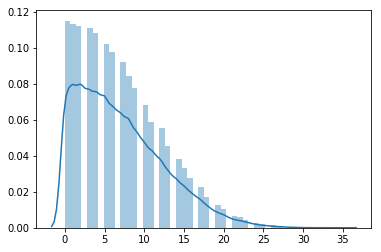

In [9]:
other = np.array(other_card)
sns.distplot(other)
plt.show()

In [10]:
print('Probability that other card has free coffee left:')
print(1 - np.where(other == 0, True, False).mean())

Probability that other card has free coffee left:
0.91944


In [11]:
print('Expected number of free coffees left on other card:')
print(np.mean(other))

Expected number of free coffees left on other card:
6.99575
